# MNIST-Visualization 
Author: Simon Nickl



In [168]:
# dl imports:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

# General Visualization and t-SNE imports:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import softmax
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

In [169]:
# Load MNIST images and labels.
(train_images, train_labels_dec), (test_images, test_labels_dec) = mnist.load_data()
train_images = train_images / 255
test_images = test_images / 255
train_labels = to_categorical(train_labels_dec)
test_labels = to_categorical(test_labels_dec)

In [170]:
# Create simple model with callback for tensorboard.
# The model is only for visualization purpose, so we don't use validation data.
tb_logdir = <'path'>
input_tensor = Input(shape=(train_images.shape[1], train_images.shape[2],))
l1 = layers.Flatten()(input_tensor)
l2 = layers.Dense(512, activation='relu')(l1)
number = layers.Dense(10, activation='softmax')(l2)

model = Model(input_tensor, number)
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [tf.keras.callbacks.TensorBoard(log_dir=tb_logdir, 
                                            histogram_freq=1, 
                                            embeddings_freq=1)]

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [171]:
# We train our model.
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, callbacks=callbacks)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 37s 621us/sample - loss: 0.2549 - accuracy: 0.9257
Epoch 2/5
60000/60000 [==============================] - 37s 610us/sample - loss: 0.1051 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 36s 596us/sample - loss: 0.0695 - accuracy: 0.9788
Epoch 4/5
60000/60000 [==============================] - 36s 596us/sample - loss: 0.0506 - accuracy: 0.9844
Epoch 5/5
60000/60000 [==============================] - 41s 680us/sample - loss: 0.0374 - accuracy: 0.9888


In [172]:
# Evaluate the test data.
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 26s 3ms/sample - loss: 0.0703 - accuracy: 0.9804


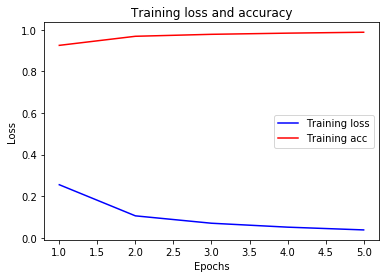

In [173]:
# Plot accuracy and loss of your training epochs.
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, acc, 'r', label='Training acc')
plt.title('Training loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

(512, 784)
(512,)


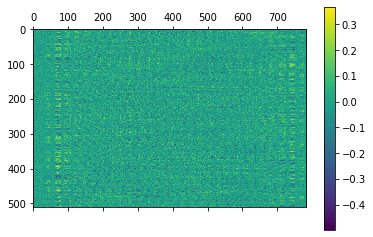

In [174]:
#Visualize all weights of layer l2.
all_l2_weights = np.asanyarray(model.layers[2].get_weights()[0]).T
print(all_l2_weights.shape)
all_l2_bias = np.asanyarray(model.layers[2].get_weights()[1])
print(all_l2_bias.shape)

all_l2_weights_map = plt.matshow(all_l2_weights)
plt.colorbar(all_l2_weights_map)

[[1.9992993e-11 3.5741001e-20 9.1463481e-10 8.4960788e-11 1.1095227e-18
  3.4360667e-11 4.6783752e-20 1.0000000e+00 8.6224924e-13 4.4678099e-08]]
7
7


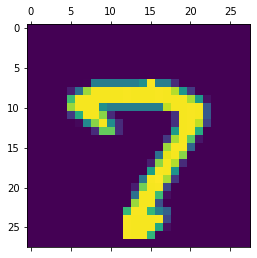

In [175]:
# Pick an image and use predict. You can compare the output of your last layer 
# and the predicted value with your actual label.
n_image = 52
pred_test = train_images[n_image].reshape(1, train_images.shape[1], 
                                          train_images.shape[2])
prediction = model.predict(pred_test)
print(prediction)
print(np.argmax(prediction))
print(np.argmax(train_labels[n_image]))
plt.matshow(train_images[n_image])

57


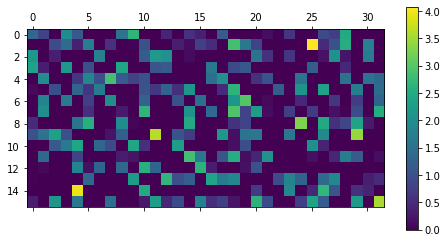

In [176]:
# We calculate all weights for our picked test picture. We plot all activations and pick the highest. 
a_1 = train_images[n_image].reshape(train_images.shape[1]*
                                    train_images.shape[2])
z_2 = all_l2_weights@a_1 + all_l2_bias
z_2[z_2<0] = 0
a_2 = z_2
a_2_for_plt = z_2.reshape(16, 32)
a_2_plt = plt.matshow(a_2_for_plt)
plt.colorbar(a_2_plt)
max_activation = np.argmax(a_2)
print(max_activation)

(28, 28)


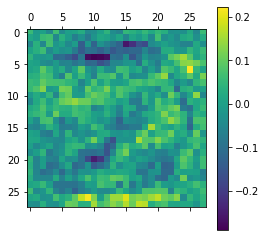

In [177]:
# Reshaped plot of all wights in the highest activation for our picked image.
n_perc = max_activation
single_l2_weights = all_l2_weights[n_perc].reshape(train_images.shape[1], 
                                                   train_images.shape[2])
print(single_l2_weights.shape)
single_l2_weights_map = plt.matshow(single_l2_weights)
plt.colorbar(single_l2_weights_map)

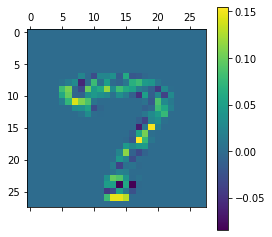

In [178]:
# Layer weights multiplied with our input image.
wa = train_images[n_image]*single_l2_weights
wa_plt = plt.matshow(wa)
plt.colorbar(wa_plt)

In [179]:
# Activition
z = np.sum(wa) + all_l2_bias[n_perc]
print(z)

4.080255760191073


In [180]:
# Let's get all the wights and bias of layer number as well to calculate our output by hand.
all_number_bias = np.asanyarray(model.layers[3].get_weights()[1])
print(all_number_bias.shape)
all_number_weights = np.asanyarray(model.layers[3].get_weights()[0]).T
print(all_number_weights.shape)

(10,)
(10, 512)


In [181]:
# Output of our last layer (compare it with the predictet one earlier).
z_3 = all_number_weights@a_2 + all_number_bias
z_3 = softmax(z_3)
print(np.argmax(z_3))
print(z_3)

7
[1.99930459e-11 3.57409837e-20 9.14634829e-10 8.49609497e-11
 1.10951635e-18 3.43606942e-11 4.67840569e-20 9.99999954e-01
 8.62252198e-13 4.46780661e-08]


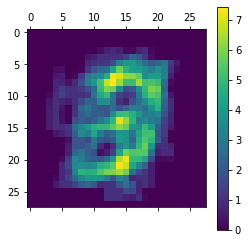

In [182]:
# Sum of hand picked numbers 0-9. 
n_image_set = np.array([1, 8, 82, 7, 2, 0, 18, 52, 17, 4])
sum_pixels = train_images[n_image_set]
sum_pixels = sum_pixels.sum(axis=0)
pixels_plt = plt.matshow(sum_pixels)
plt.colorbar(pixels_plt)

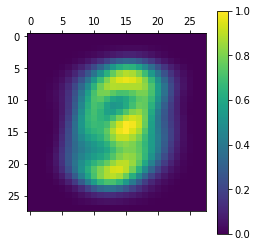

In [183]:
# Sum of all images in our training set.
non_zeros_images = train_images.sum(axis=0)
non_zeros_images = non_zeros_images*(1/np.max(non_zeros_images))
non_zeros_images_plt = plt.matshow(non_zeros_images)
plt.colorbar(non_zeros_images_plt)

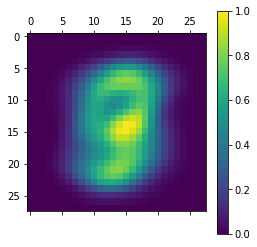

In [184]:
# Sum of all numbers excluding zeros.
non_zeros_images = train_images[train_labels[:,0]!=1]
non_zeros_images = non_zeros_images.sum(axis=0)
non_zeros_images = non_zeros_images*(1/np.max(non_zeros_images))
non_zeros_images_plt = plt.matshow(non_zeros_images)
plt.colorbar(non_zeros_images_plt)

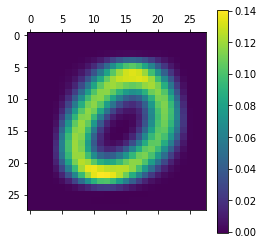

In [185]:
# Sum of all zeros.
all_images = train_images.sum(axis=0)
all_images = all_images*(1/np.max(all_images))
diff_images = all_images - non_zeros_images
diff_images = diff_images # *(1/np.max(diff_images))
all_images_plt = plt.matshow(diff_images)
plt.colorbar(all_images_plt)

In [186]:
# Visualize MNIST for all layers using t-SNE.
# Change perplexity (between 5 and 50 recommended) to see ow it'll change the plot.
n_data_pts = 2000

X = train_images.reshape(train_images.shape[0], 
                         train_images.shape[1]*train_images.shape[2])

# Reduce dimensionality to 50 before using t-SNE. PCA is much faster.
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X) 
 
# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[:n_data_pts,:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.018s...
[t-SNE] Computed neighbors for 2000 samples in 0.524s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 2.563316
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.387978
[t-SNE] KL divergence after 1000 iterations: 1.102200


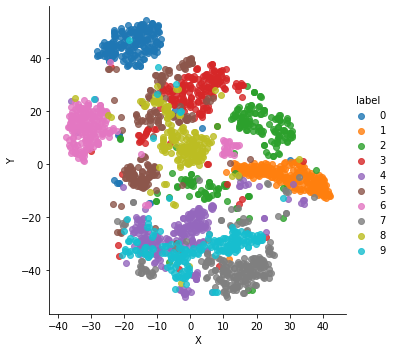

In [187]:
# Visualize
df_tsne = pd.DataFrame(tsne_results, columns=['X', 'Y'])
df_tsne['label'] = train_labels_dec[:n_data_pts]
sns.lmplot(x='X', y='Y', data=df_tsne, hue='label', fit_reg=False)

In [188]:
# Calculate all activitions of layer l2
z_2 = np.zeros((n_data_pts, 512))
for n in range(n_data_pts):
    z_2[n] = all_l2_weights@X[n, :] + all_l2_bias
    z_2[z_2<0] = 0
a_2 = z_2

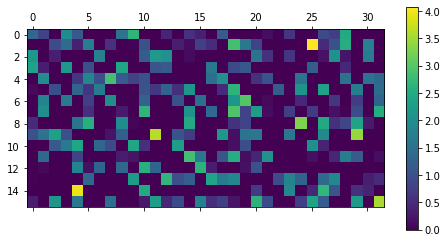

In [189]:
# Test print to see if activition is the same as for n_image earlier.
a_2_for_plt = z_2[n_image].reshape(16, 32)
a_2_plt = plt.matshow(a_2_for_plt)
plt.colorbar(a_2_plt)

In [190]:
# Reduce dimensionality to 50 before using t-SNE. PCA is much faster.
pca = PCA(n_components=50)
X_pca = pca.fit_transform(a_2) 
 
# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[:n_data_pts,:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.030s...
[t-SNE] Computed neighbors for 2000 samples in 0.582s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 4.772456
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.524094
[t-SNE] KL divergence after 1000 iterations: 0.832556


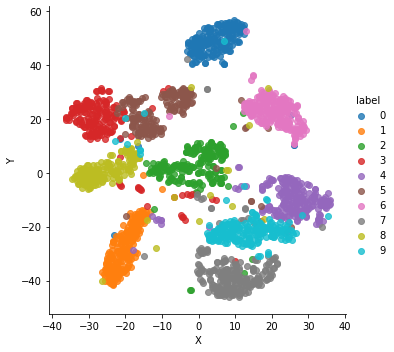

In [191]:
# Visualize
df_tsne = pd.DataFrame(tsne_results, columns=['X', 'Y'])
df_tsne['label'] = train_labels_dec[:n_data_pts]
sns.lmplot(x='X', y='Y', data=df_tsne, hue='label', fit_reg=False)

In [192]:
# Calculate all activitions of layer numbers
z_3 = np.zeros((n_data_pts, 10))
for n in range(n_data_pts):
    z_3[n] = all_number_weights@a_2[n, :] + all_number_bias
    a_3 = softmax(z_3)

In [193]:
# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(a_3[:n_data_pts,:])

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.006s...
[t-SNE] Computed neighbors for 2000 samples in 0.092s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.401627
[t-SNE] KL divergence after 1000 iterations: 0.197008


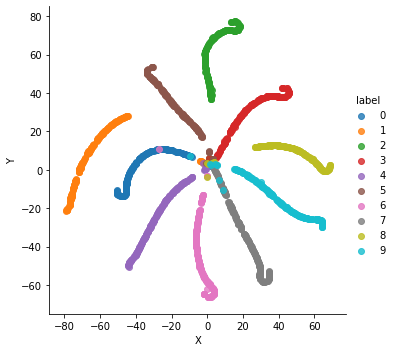

In [194]:
# Visualize
df_tsne = pd.DataFrame(tsne_results, columns=['X', 'Y'])
df_tsne['label'] = train_labels_dec[:n_data_pts]
sns.lmplot(x='X', y='Y', data=df_tsne, hue='label', fit_reg=False)